In [46]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import numpy as np

from astropy.visualization import time_support

from sunpy import timeseries as ts
from sunpy.net import Fido
from sunpy.net import attrs as a

In [33]:
tstart = "2024-10-03 01:00"
tend = "2024-10-03 23:00"
result = Fido.search(a.Time(tstart, tend), a.Instrument("XRS"))
print(result)

Results from 1 Provider:

4 Results from the XRSClient:
Source: <8: https://umbra.nascom.nasa.gov/goes/fits 
8-15: https://www.ncei.noaa.gov/data/goes-space-environment-monitor/access/science/ 
16-17: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/

       Start Time               End Time        ... Provider Resolution
----------------------- ----------------------- ... -------- ----------
2024-10-03 00:00:00.000 2024-10-03 23:59:59.999 ...     NOAA      flx1s
2024-10-03 00:00:00.000 2024-10-03 23:59:59.999 ...     NOAA      avg1m
2024-10-03 00:00:00.000 2024-10-03 23:59:59.999 ...     NOAA      flx1s
2024-10-03 00:00:00.000 2024-10-03 23:59:59.999 ...     NOAA      avg1m




In [34]:
result_goes16 = Fido.search(a.Time(tstart, tend), a.Instrument("XRS"), a.goes.SatelliteNumber(16), a.Resolution("flx1s"))
print(result_goes16)

Results from 1 Provider:

1 Results from the XRSClient:
Source: <8: https://umbra.nascom.nasa.gov/goes/fits 
8-15: https://www.ncei.noaa.gov/data/goes-space-environment-monitor/access/science/ 
16-17: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/

       Start Time               End Time        ... Provider Resolution
----------------------- ----------------------- ... -------- ----------
2024-10-03 00:00:00.000 2024-10-03 23:59:59.999 ...     NOAA      flx1s




In [35]:
file_goes16 = Fido.fetch(result_goes16)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

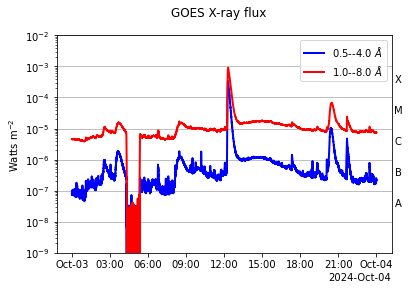

In [36]:
goes_16 = ts.TimeSeries(file_goes16)
goes_16.peek()

In [37]:
df = goes_16.to_dataframe()
df = df[(df["xrsa_quality"] == 0) & (df["xrsb_quality"] == 0)]
goes_16 = ts.TimeSeries(df, goes_16.meta, goes_16.units)

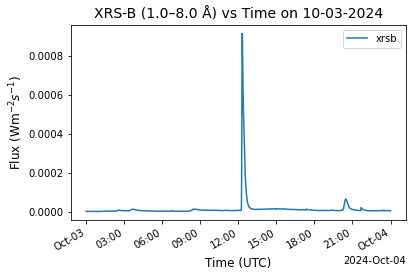

In [49]:
# Plot only XRS-B channel (1.0–8.0 Å)
fig, ax = plt.subplots()
goes_16.plot(axes=ax, columns=["xrsb"])
ax.set_title("XRS-B (1.0–8.0 Å) vs Time on 10-03-2024", fontsize=14)  
ax.set_xlabel("Time (UTC)", fontsize=12)                    
ax.set_ylabel("Flux (Wm$^{-2}$$s^{-1}$)", fontsize=12)
plt.show()

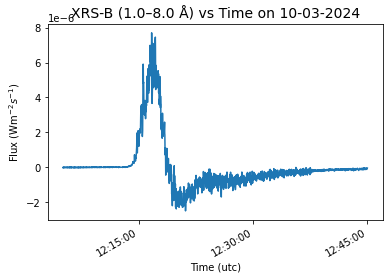

In [48]:
goes_flare = goes_16.truncate("2024-10-03 12:05", "2024-10-03 12:45")

time_support()
fig, ax = plt.subplots()
ax.plot(goes_flare.time, np.gradient(goes_flare.quantity("xrsb")))
ax.set_title("XRS-B (1.0–8.0 Å) vs Time on 10-03-2024", fontsize=14)  
ax.set_ylabel("Flux (Wm$^{-2}$$s^{-1}$)")
date_format = DateFormatter("%H:%M:%S")
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
plt.show()

In [9]:
results = Fido.search(a.Time("2020-11-20 00:00", "2020-11-21 23:00"), a.Instrument("XRS"), a.Resolution("flx1s"))
print(results)

Results from 1 Provider:

4 Results from the XRSClient:
Source: <8: https://umbra.nascom.nasa.gov/goes/fits 
8-15: https://www.ncei.noaa.gov/data/goes-space-environment-monitor/access/science/ 
16-17: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/

       Start Time               End Time        ... Provider Resolution
----------------------- ----------------------- ... -------- ----------
2020-11-20 00:00:00.000 2020-11-20 23:59:59.999 ...     NOAA      flx1s
2020-11-21 00:00:00.000 2020-11-21 23:59:59.999 ...     NOAA      flx1s
2020-11-20 00:00:00.000 2020-11-20 23:59:59.999 ...     NOAA      flx1s
2020-11-21 00:00:00.000 2020-11-21 23:59:59.999 ...     NOAA      flx1s




In [29]:
# solar cycle minimum
results_16 = Fido.search(a.Time("2019-12-20 00:00", "2019-12-21 23:00"), a.Instrument("XRS"),
                         a.goes.SatelliteNumber(16))
print(results_16)

Results from 1 Provider:

4 Results from the XRSClient:
Source: <8: https://umbra.nascom.nasa.gov/goes/fits 
8-15: https://www.ncei.noaa.gov/data/goes-space-environment-monitor/access/science/ 
16-17: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/

       Start Time               End Time        ... Provider Resolution
----------------------- ----------------------- ... -------- ----------
2019-12-20 00:00:00.000 2019-12-20 23:59:59.999 ...     NOAA      flx1s
2019-12-21 00:00:00.000 2019-12-21 23:59:59.999 ...     NOAA      flx1s
2019-12-20 00:00:00.000 2019-12-20 23:59:59.999 ...     NOAA      avg1m
2019-12-21 00:00:00.000 2019-12-21 23:59:59.999 ...     NOAA      avg1m




Files Downloaded:   0%|          | 0/4 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20191220_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-flx1s_g16_d20191221_v2-2-0.nc:   0%|          | 0.00/5.03M [00:00<?, ?B/s]

sci_xrsf-l2-flx1s_g16_d20191220_v2-2-0.nc:   0%|          | 0.00/5.02M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20191221_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

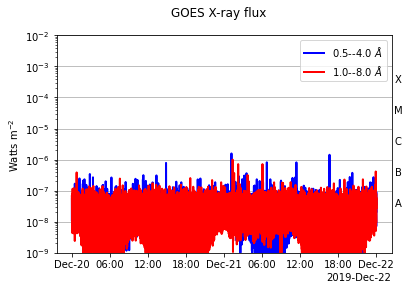

In [30]:
files = Fido.fetch(results_16)
# We use the `concatenate=True` keyword argument in TimeSeries, as
# we have two files and want to create one timeseries from them.
goes_16 = ts.TimeSeries(files, concatenate=True)
goes_16.peek()